# Методы машинного обучения.

## ЛР6. - Построить классификатор «Ирисов Фишера» с использованием байесовского подхода (кроме наивного байесовского классификатора).

В рамках выполнения задания:
- Осуществить исследование и подготовку исходных данных.
- Построить гистограммы распределения значений для каждого признака и для каждого класса.
- Произвести визуализацию проекций классов на плоскости, где по осям  отложены различные комбинации пар признаков.
- Построить матрицы корреляций между различными признаками, как для всей выборки в целом, так и для отдельных классов.
- Построить классификатор с использованием байесовского подхода.
- Оценить точность, полноту, F-меру. Построить матрицу ошибок.


## Выполнение

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ml_lab_06/ЛР6_Ирисы Фишера.xlsx')
df

,Длина чашелистика,Ширина чашелистика,Длина лепестка,Ширина лепестка,Вид ириса
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.columns

Index(['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка',
       'Ширина лепестка', 'Вид ириса'],
      dtype='object')

In [ ]:
X = df[['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка']]
y = df['Вид ириса']

In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

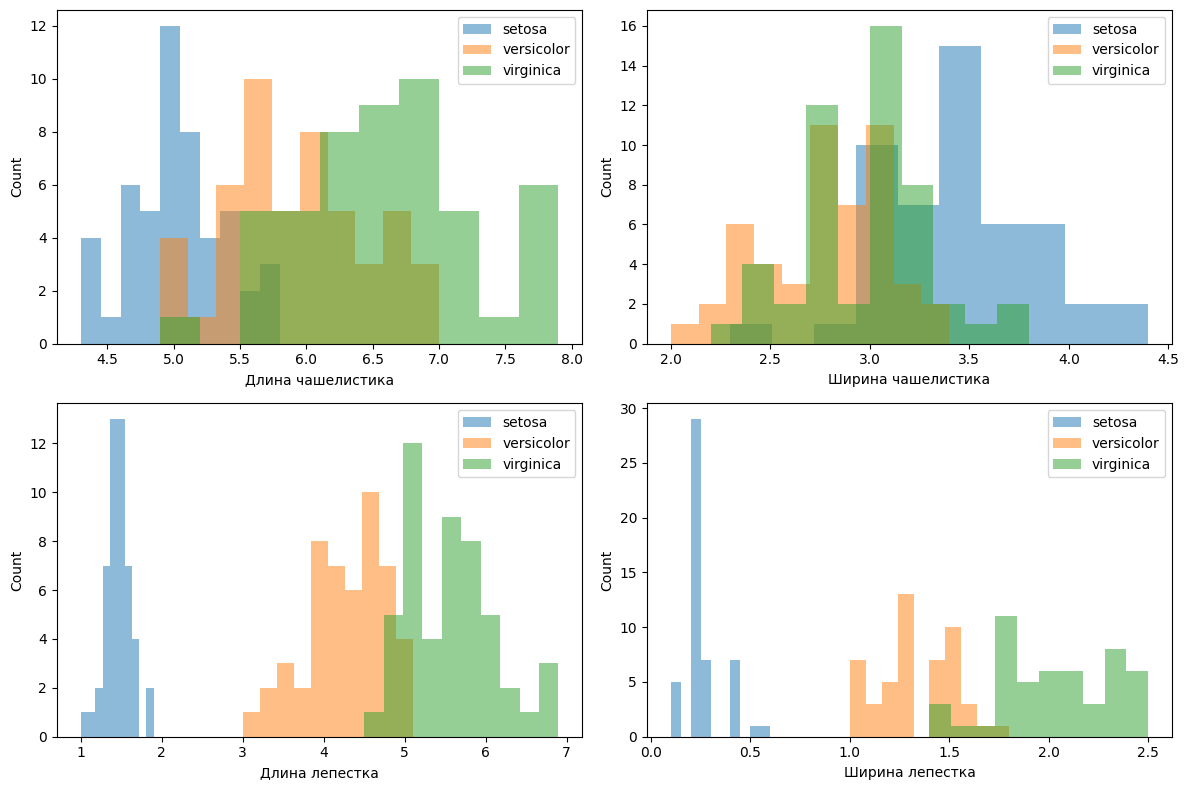

In [ ]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(X.columns):
    plt.subplot(2, 2, i+1)
    for species in df['Вид ириса'].unique():
        subset = df[df['Вид ириса'] == species]
        plt.hist(subset[feature], label=species, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

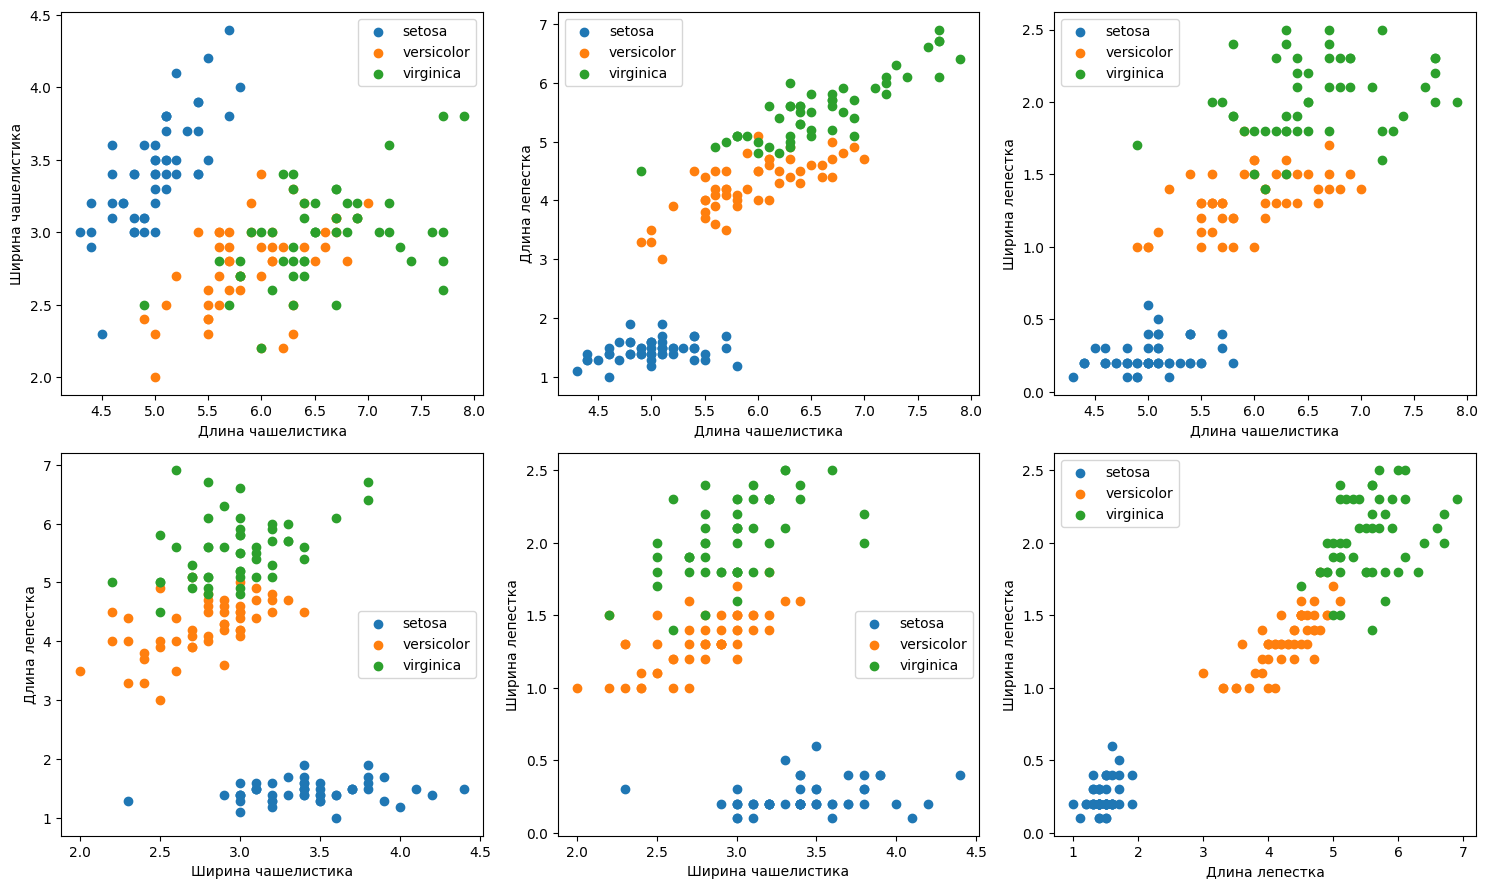

In [ ]:
pairs = [(i, j) for i in range(4) for j in range(i+1, 4)]
plt.figure(figsize=(15, 9))
for idx, (i, j) in enumerate(pairs):
    plt.subplot(2, 3, idx+1)
    for species in df['Вид ириса'].unique():
        species_mask = df['Вид ириса'] == species
        plt.scatter(X.loc[species_mask, X.columns[i]], X.loc[species_mask, X.columns[j]], label=species)
    plt.xlabel(X.columns[i])
    plt.ylabel(X.columns[j])
    plt.legend()
plt.tight_layout()
plt.show()

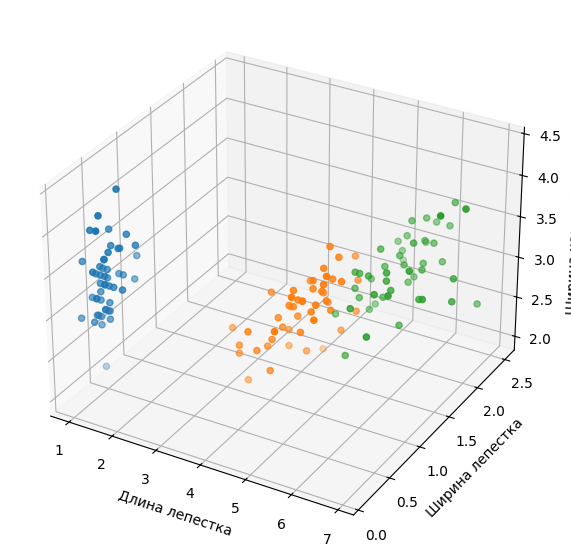

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.set_xlabel('Длина лепестка')
ax.set_ylabel('Ширина лепестка')
ax.set_zlabel('Ширина чашелистика')

for species in df['Вид ириса'].unique():
    species_mask = df['Вид ириса'] == species
    dims = [X[species_mask][label] for label in ['Длина лепестка', 'Ширина лепестка', 'Ширина чашелистика']]
    ax.scatter(*dims, label=species)

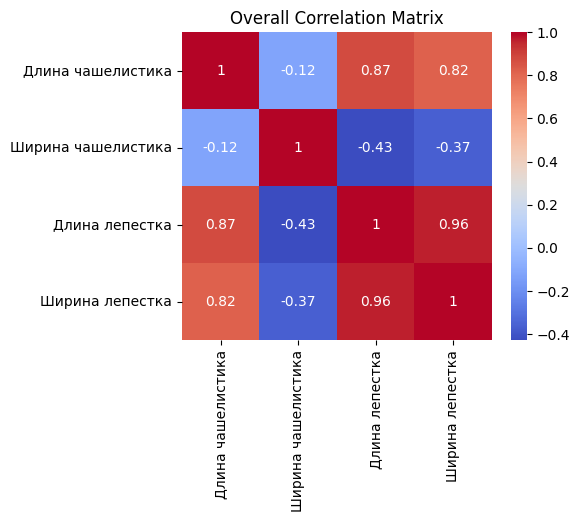

In [ ]:
plt.figure(figsize=(5, 4))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Overall Correlation Matrix')
plt.show()

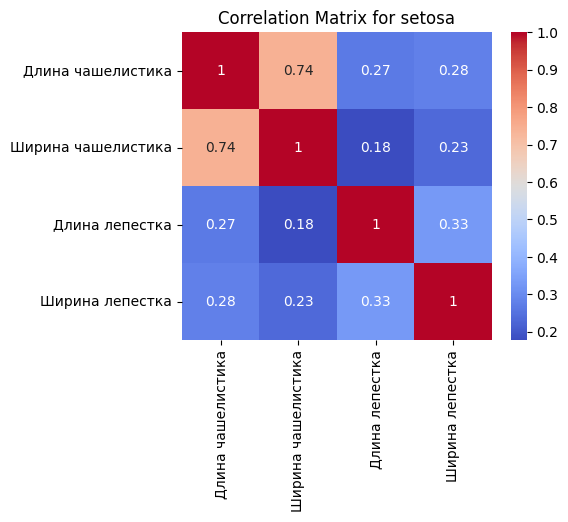

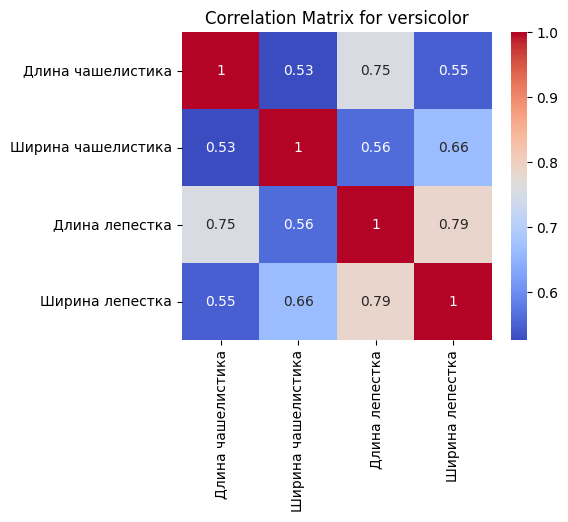

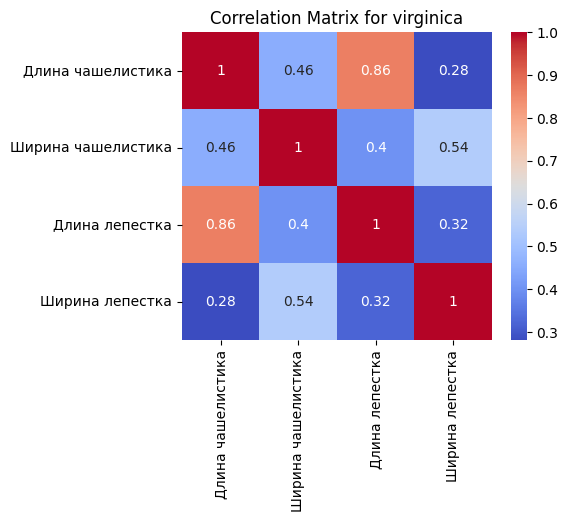

In [ ]:
for species in df['Вид ириса'].unique():
    species_data = X[df['Вид ириса'] == species]
    plt.figure(figsize=(5, 4))
    sns.heatmap(species_data.corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix for {species}')
    plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=7)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
y_pred = lda.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("\nAdditional Metrics:")
mcc = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {mcc:.4f}")


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.94      0.94      0.94        16
   virginica       0.94      0.94      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Additional Metrics:
MCC: 0.9326


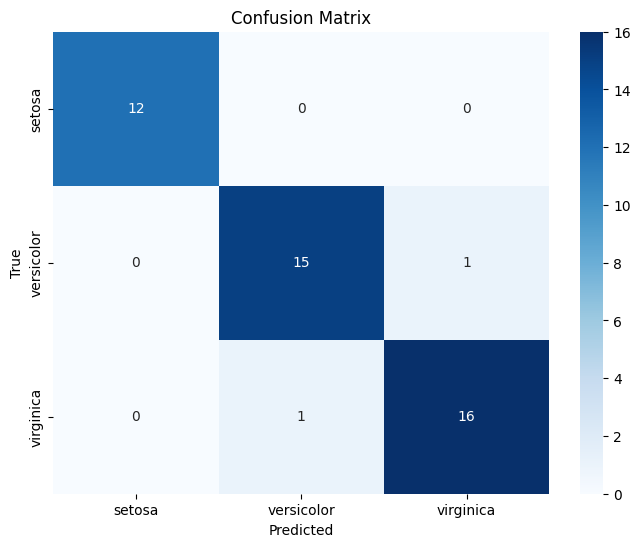

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

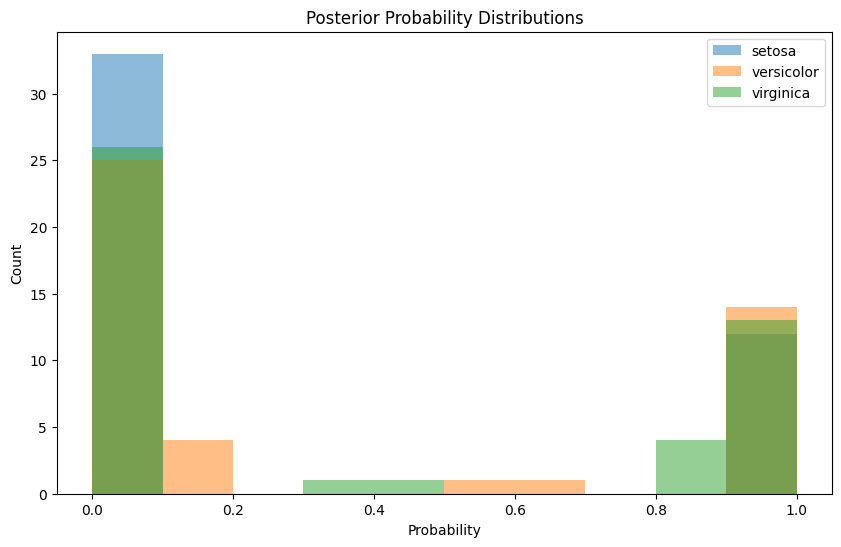

In [ ]:
probabilities = lda.predict_proba(X_test)

plt.figure(figsize=(10, 6))
for i, species in enumerate(df['Вид ириса'].unique()):
    plt.hist(probabilities[:, i], label=species, alpha=0.5)
plt.title('Posterior Probability Distributions')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.legend()
plt.show()